# **Assingment**: Default Credit Cards Clients
## Judit Díaz Llorens - MBD APRIL 2023

A bank in you region want to build a model to predict credit card defaulters more accurately in order minimize money loss. For this task we have a set of data on default payments and demographic data to help us do our task. Data is comprised in the following CSV files:


**TRAINING**

**`train_customers.csv`**
 - `ID`: ID of each client
 - `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit
 - `SEX`: Gender (1=male, 2=female)
 - `EDUCATION`: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
 - `MARRIAGE`: Marital status (1=married, 2=single, 3=others)
 - `AGE`: Age in years

**`train_series.csv`**
 - `ID`: ID of each client
 - `MONTH`: The month to wich data is refering
 - `PAY`: Repayment status in the corresponding month (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
 - `BILL_AMT`: Amount of bill statement in the corresponding month (NT dollar)
 - `PAY_AMT`: Amount of previous payment in the corresponding month (NT dollar)

**`train_target.csv`**
 - `DEFAULT_JULY`: Default payment in July (1=yes, 0=no)


**TEST** (For PART 3)
 - **`test_data.csv`**

**SUBMISSION** (For PART 3)
 - **`submission_features.csv`**

**BACKUP**
 - **`train_data.csv`**

Load all data and answer the following questions

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc, confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, classification_report


In [ ]:
series = pd.read_csv("train_series.csv")

In [ ]:
series.head() #first I analyze what is inside the CSV file

,ID,MONTH,PAY,BILL_AMT,PAY_AMT
0,15936,JUNE,1.0,0.0,797.0
1,15936,MAY,-1.0,797.0,190.0
2,15936,APRIL,-1.0,190.0,3269.0
3,15936,MARCH,-1.0,3260.0,32617.0
4,15936,FEBRUARY,-1.0,32617.0,5000.0


In [ ]:
series.count() #first, I start with this

ID          90000
MONTH       90000
PAY         90000
BILL_AMT    90000
PAY_AMT     90000
dtype: int64

In [ ]:
len(series)

90000

In [ ]:
df = series.copy()

- index
- columns
 - values
- aggfunc

In [ ]:
dff = df.pivot_table(index='MONTH', columns='PAY', values='BILL_AMT', aggfunc='sum').fillna(0)

In [ ]:
(dff
 .div(1000000)
 .style.background_gradient(axis=None).format(precision=0))

PAY,-2.000000,-1.000000,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000
MONTH,,,,,,,,,,,
APRIL,8,33,558,0,90,5,3,1,1,0,0
FEBRUARY,7,28,492,0,66,4,2,0,0,0,0
JANUARY,7,26,467,0,73,3,1,1,0,0,0
JUNE,11,30,576,49,85,6,3,1,1,1,1
MARCH,7,33,525,0,73,4,2,1,0,0,0
MAY,9,30,582,-0,98,9,2,1,1,1,0


## **A. DATA ENGINEERING**

### **Question 1**

Load the train_series.csv file and **pivot the time-dependent columns (PAY, BILL_AMT, and PAY_AMT) to build one column of these per month. (Ex. PAY_JUNE, PAY_MAY, ..., BILL_AMT_JUNE, ...)**


In [ ]:
series.info() #no-nulls in those columns! the three of them are data type: float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        90000 non-null  int64  
 1   MONTH     90000 non-null  object 
 2   PAY       90000 non-null  float64
 3   BILL_AMT  90000 non-null  float64
 4   PAY_AMT   90000 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.4+ MB


In [ ]:
series.count() #same number of rows

ID          90000
MONTH       90000
PAY         90000
BILL_AMT    90000
PAY_AMT     90000
dtype: int64

**Conclusion:** There aren't nulls in this data set and the three columns I need to pivote are data type: *FLOAT* -->  no further change

In [ ]:
series_pivoted = series.pivot(index="ID", columns="MONTH", values=["PAY", "BILL_AMT", "PAY_AMT"])

In [ ]:
series_pivoted.head() #pivote both

PAY                                  BILL_AMT                    \
MONTH APRIL FEBRUARY JANUARY JUNE MARCH  MAY    APRIL FEBRUARY  JANUARY   
ID                                                                        
0       0.0     -1.0     0.0 -1.0   0.0  0.0  13600.0  44024.0  18697.0   
1       0.0      0.0     0.0  0.0   0.0  0.0  53169.0  50372.0  49470.0   
3      -2.0     -2.0    -2.0 -2.0  -2.0 -2.0      0.0      0.0      0.0   
4       0.0      0.0     0.0  0.0   0.0  0.0   9044.0   9417.0   9617.0   
5       0.0      0.0     0.0  0.0   0.0  0.0  44412.0  35704.0  36524.0   

                                 PAY_AMT                                     \
MONTH     JUNE    MARCH      MAY   APRIL FEBRUARY  JANUARY    JUNE    MARCH   
ID                                                                            
0      28991.0      0.0  24391.0     0.0    680.0  10000.0  1300.0  22373.0   
1      75662.0  50875.0  70073.0  2000.0   1903.0   2006.0  3212.0   1603.0   
3      23570.0      0.0    735.0     0.0      0.0      0.0   742.0      0.0   
4       8214.0   9225.0   8034.0   331.0    356.0    330.0  1140.0    341.0   
5      50840.0  45402.0  49592.0  1837.0   1254.0   1387.0  2100.0   1139.0   

               
MONTH     MAY  
ID             
0      1000.0  
1      2106.0  
3         0.0  
4      1150.0  
5      1847.0

In [ ]:
series_pivoted.columns = [f"{column}_{month.upper()}" for column, month in series_pivoted.columns] #to put the column + month in upper case

But as the question says i need to do a list comprehension that iterates through the multindex column names--> concatenating the {column} name (represented by column--> PAY, BILL_AMT, PAY_AMT) with the uppercase representation of the {month} (represented by every month)

In [ ]:
series_pivoted.head()

,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,PAY_MARCH,PAY_MAY,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY
ID,,,,,,,,,,,,,,,,,,
0,0.0,-1.0,0.0,-1.0,0.0,0.0,13600.0,44024.0,18697.0,28991.0,0.0,24391.0,0.0,680.0,10000.0,1300.0,22373.0,1000.0
1,0.0,0.0,0.0,0.0,0.0,0.0,53169.0,50372.0,49470.0,75662.0,50875.0,70073.0,2000.0,1903.0,2006.0,3212.0,1603.0,2106.0
3,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,23570.0,0.0,735.0,0.0,0.0,0.0,742.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,9044.0,9417.0,9617.0,8214.0,9225.0,8034.0,331.0,356.0,330.0,1140.0,341.0,1150.0
5,0.0,0.0,0.0,0.0,0.0,0.0,44412.0,35704.0,36524.0,50840.0,45402.0,49592.0,1837.0,1254.0,1387.0,2100.0,1139.0,1847.0


In [ ]:
series_pivoted.isnull().sum()

PAY_APRIL            0
PAY_FEBRUARY         0
PAY_JANUARY          0
PAY_JUNE             0
PAY_MARCH            0
PAY_MAY              0
BILL_AMT_APRIL       0
BILL_AMT_FEBRUARY    0
BILL_AMT_JANUARY     0
BILL_AMT_JUNE        0
BILL_AMT_MARCH       0
BILL_AMT_MAY         0
PAY_AMT_APRIL        0
PAY_AMT_FEBRUARY     0
PAY_AMT_JANUARY      0
PAY_AMT_JUNE         0
PAY_AMT_MARCH        0
PAY_AMT_MAY          0
dtype: int64

In [ ]:
series_pivoted.count()

PAY_APRIL            15000
PAY_FEBRUARY         15000
PAY_JANUARY          15000
PAY_JUNE             15000
PAY_MARCH            15000
PAY_MAY              15000
BILL_AMT_APRIL       15000
BILL_AMT_FEBRUARY    15000
BILL_AMT_JANUARY     15000
BILL_AMT_JUNE        15000
BILL_AMT_MARCH       15000
BILL_AMT_MAY         15000
PAY_AMT_APRIL        15000
PAY_AMT_FEBRUARY     15000
PAY_AMT_JANUARY      15000
PAY_AMT_JUNE         15000
PAY_AMT_MARCH        15000
PAY_AMT_MAY          15000
dtype: int64

### **Question 2**

Load train_customers.csv and **include the pivoted table of time series data. The resulting table must be a table with one row per customer (ID)**


In [ ]:
cust = pd.read_csv("train_customers.csv")

In [ ]:
cust.count() #it has the same number of rows so you can merge

ID           15000
LIMIT_BAL    15000
SEX          15000
EDUCATION    15000
MARRIAGE     15000
AGE          15000
dtype: int64

In [ ]:
complete = cust.merge(series_pivoted, on='ID', how='left')
#column i want to merge DF == ID and left join which includes all rows from the left DataFrame (cust) and the matching rows from the right DataFrame (series_pivoted)

## new DF

In [ ]:
complete.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,...,BILL_AMT_JANUARY,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY
0,15936,140000.0,2,1,1,39,-1.0,-1.0,0.0,1.0,...,20506.0,0.0,3260.0,797.0,3269.0,5000.0,2774.0,797.0,32617.0,190.0
1,15248,90000.0,2,2,1,49,-2.0,-1.0,-1.0,1.0,...,6990.0,0.0,2146.0,0.0,2146.0,6990.0,3550.0,0.0,2452.0,0.0
2,27163,150000.0,2,1,1,37,-1.0,0.0,-1.0,-1.0,...,1914.0,4787.0,1291.0,1046.0,1193.0,3000.0,0.0,1054.0,0.0,344.0
3,13955,160000.0,1,3,1,38,0.0,0.0,0.0,0.0,...,7083.0,25003.0,15778.0,23621.0,5000.0,0.0,0.0,2000.0,1500.0,5060.0
4,23604,360000.0,1,2,1,28,2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,2500.0,0.0,0.0,0.0,2500.0,0.0,0.0


### **Question 3**

**Include information from the target (train_target.csv) on the table** --> my target (y)

In [ ]:
target = pd.read_csv("train_target.csv")
target.head()

,ID,DEFAULT_JULY
0,15936,0
1,15248,1
2,27163,0
3,13955,0
4,23604,0


In [ ]:
print(complete["ID"].dtype)
print(target["ID"].dtype)

int64
int64


In [ ]:
print(complete["ID"].nunique())
print(target["ID"].nunique())

15000
15000


In [ ]:
complete_ids = set(complete["ID"].unique())
target_ids = set(target["ID"].unique())

if complete_ids == target_ids:
    print("The ID values in both DataFrames match.")
else:
    print("The ID values in both DataFrames do not match.")
    #to see if they match to put together everything and create a definitive DF

The ID values in both DataFrames match.


In [ ]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            15000 non-null  int64
 1   DEFAULT_JULY  15000 non-null  int64
dtypes: int64(2)
memory usage: 234.5 KB


In [ ]:
final_df = complete.merge(target, on="ID", how="left") #MY DEFINITIVE DF

## new DF

In [ ]:
final_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,...,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY,DEFAULT_JULY
0,15936,140000.0,2,1,1,39,-1.0,-1.0,0.0,1.0,...,0.0,3260.0,797.0,3269.0,5000.0,2774.0,797.0,32617.0,190.0,0
1,15248,90000.0,2,2,1,49,-2.0,-1.0,-1.0,1.0,...,0.0,2146.0,0.0,2146.0,6990.0,3550.0,0.0,2452.0,0.0,1
2,27163,150000.0,2,1,1,37,-1.0,0.0,-1.0,-1.0,...,4787.0,1291.0,1046.0,1193.0,3000.0,0.0,1054.0,0.0,344.0,0
3,13955,160000.0,1,3,1,38,0.0,0.0,0.0,0.0,...,25003.0,15778.0,23621.0,5000.0,0.0,0.0,2000.0,1500.0,5060.0,0
4,23604,360000.0,1,2,1,28,2.0,-2.0,-2.0,-2.0,...,0.0,0.0,2500.0,0.0,0.0,0.0,2500.0,0.0,0.0,0


In [ ]:
final_df.isnull().sum()

ID                   0
LIMIT_BAL            0
SEX                  0
EDUCATION            0
MARRIAGE             0
AGE                  0
PAY_APRIL            0
PAY_FEBRUARY         0
PAY_JANUARY          0
PAY_JUNE             0
PAY_MARCH            0
PAY_MAY              0
BILL_AMT_APRIL       0
BILL_AMT_FEBRUARY    0
BILL_AMT_JANUARY     0
BILL_AMT_JUNE        0
BILL_AMT_MARCH       0
BILL_AMT_MAY         0
PAY_AMT_APRIL        0
PAY_AMT_FEBRUARY     0
PAY_AMT_JANUARY      0
PAY_AMT_JUNE         0
PAY_AMT_MARCH        0
PAY_AMT_MAY          0
DEFAULT_JULY         0
dtype: int64

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 15000 non-null  int64  
 1   LIMIT_BAL          15000 non-null  float64
 2   SEX                15000 non-null  int64  
 3   EDUCATION          15000 non-null  int64  
 4   MARRIAGE           15000 non-null  int64  
 5   AGE                15000 non-null  int64  
 6   PAY_APRIL          15000 non-null  float64
 7   PAY_FEBRUARY       15000 non-null  float64
 8   PAY_JANUARY        15000 non-null  float64
 9   PAY_JUNE           15000 non-null  float64
 10  PAY_MARCH          15000 non-null  float64
 11  PAY_MAY            15000 non-null  float64
 12  BILL_AMT_APRIL     15000 non-null  float64
 13  BILL_AMT_FEBRUARY  15000 non-null  float64
 14  BILL_AMT_JANUARY   15000 non-null  float64
 15  BILL_AMT_JUNE      15000 non-null  float64
 16  BILL_AMT_MARCH     150

### Importing the GOOD Excel from BB to compare with the DF i created--> SEE IF MINE IS CORRECT

SPOILER: It is **;)**

In [ ]:
train_data = pd.read_csv("train_data.csv") #FROM THE BB (GOOD ONE)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 15000 non-null  int64  
 1   LIMIT_BAL          15000 non-null  float64
 2   SEX                15000 non-null  int64  
 3   EDUCATION          15000 non-null  int64  
 4   MARRIAGE           15000 non-null  int64  
 5   AGE                15000 non-null  int64  
 6   PAY_JUNE           15000 non-null  int64  
 7   PAY_MAY            15000 non-null  int64  
 8   PAY_APRIL          15000 non-null  int64  
 9   PAY_MARCH          15000 non-null  int64  
 10  PAY_FEBRUARY       15000 non-null  int64  
 11  PAY_JANUARY        15000 non-null  int64  
 12  BILL_AMT_JUNE      15000 non-null  float64
 13  BILL_AMT_MAY       15000 non-null  float64
 14  BILL_AMT_APRIL     15000 non-null  float64
 15  BILL_AMT_MARCH     15000 non-null  float64
 16  BILL_AMT_FEBRUARY  150

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 15000 non-null  int64  
 1   LIMIT_BAL          15000 non-null  float64
 2   SEX                15000 non-null  int64  
 3   EDUCATION          15000 non-null  int64  
 4   MARRIAGE           15000 non-null  int64  
 5   AGE                15000 non-null  int64  
 6   PAY_APRIL          15000 non-null  float64
 7   PAY_FEBRUARY       15000 non-null  float64
 8   PAY_JANUARY        15000 non-null  float64
 9   PAY_JUNE           15000 non-null  float64
 10  PAY_MARCH          15000 non-null  float64
 11  PAY_MAY            15000 non-null  float64
 12  BILL_AMT_APRIL     15000 non-null  float64
 13  BILL_AMT_FEBRUARY  15000 non-null  float64
 14  BILL_AMT_JANUARY   15000 non-null  float64
 15  BILL_AMT_JUNE      15000 non-null  float64
 16  BILL_AMT_MARCH     150

**I need to change the data type of my Pay column to integer!**

In [ ]:
# List of columns to convert to integer to make further explorations
columns_to_convert = ['PAY_APRIL', 'PAY_FEBRUARY', 'PAY_JANUARY', 'PAY_JUNE', 'PAY_MARCH', 'PAY_MAY']

final_df[columns_to_convert] = final_df[columns_to_convert].astype(int)

final_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,...,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY,DEFAULT_JULY
0,15936,140000.0,2,1,1,39,-1,-1,0,1,...,0.0,3260.0,797.0,3269.0,5000.0,2774.0,797.0,32617.0,190.0,0
1,15248,90000.0,2,2,1,49,-2,-1,-1,1,...,0.0,2146.0,0.0,2146.0,6990.0,3550.0,0.0,2452.0,0.0,1
2,27163,150000.0,2,1,1,37,-1,0,-1,-1,...,4787.0,1291.0,1046.0,1193.0,3000.0,0.0,1054.0,0.0,344.0,0
3,13955,160000.0,1,3,1,38,0,0,0,0,...,25003.0,15778.0,23621.0,5000.0,0.0,0.0,2000.0,1500.0,5060.0,0
4,23604,360000.0,1,2,1,28,2,-2,-2,-2,...,0.0,0.0,2500.0,0.0,0.0,0.0,2500.0,0.0,0.0,0


In [ ]:
final_df.info() #SAME DATA TYPE!--> NOW OK!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 15000 non-null  int64  
 1   LIMIT_BAL          15000 non-null  float64
 2   SEX                15000 non-null  int64  
 3   EDUCATION          15000 non-null  int64  
 4   MARRIAGE           15000 non-null  int64  
 5   AGE                15000 non-null  int64  
 6   PAY_APRIL          15000 non-null  int64  
 7   PAY_FEBRUARY       15000 non-null  int64  
 8   PAY_JANUARY        15000 non-null  int64  
 9   PAY_JUNE           15000 non-null  int64  
 10  PAY_MARCH          15000 non-null  int64  
 11  PAY_MAY            15000 non-null  int64  
 12  BILL_AMT_APRIL     15000 non-null  float64
 13  BILL_AMT_FEBRUARY  15000 non-null  float64
 14  BILL_AMT_JANUARY   15000 non-null  float64
 15  BILL_AMT_JUNE      15000 non-null  float64
 16  BILL_AMT_MARCH     150

In [ ]:
train_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_JUNE,PAY_MAY,PAY_APRIL,PAY_MARCH,...,BILL_AMT_MARCH,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_MARCH,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,DEFAULT_JULY
0,15936,140000.0,2,1,1,39,1,-1,-1,-1,...,3260.0,32617.0,20506.0,797.0,190.0,3269.0,32617.0,5000.0,2774.0,0
1,15248,90000.0,2,2,1,49,1,-2,-2,-1,...,2146.0,2452.0,6990.0,0.0,0.0,2146.0,2452.0,6990.0,3550.0,1
2,27163,150000.0,2,1,1,37,-1,-1,-1,0,...,1291.0,1193.0,1914.0,1054.0,344.0,1193.0,0.0,3000.0,0.0,0
3,13955,160000.0,1,3,1,38,0,0,0,0,...,15778.0,9333.0,7083.0,2000.0,5060.0,5000.0,1500.0,0.0,0.0,0
4,23604,360000.0,1,2,1,28,-2,-1,2,2,...,0.0,0.0,0.0,2500.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
len(final_df) #same lenght--> it's good to do exploratory data analysis

15000

### download my good data to my PC


In [ ]:
#file_name = 'final_df.csv'
#directory = '~/Downloads'

#file_path = f"{directory}/{file_name}"
#final_df.to_csv(file_path, index=False)

## **B. EXPLORATORY DATA ANALYSIS**

### **Question 1**

**BAR PLOT: Plot the distribution of defaulters given the Education. Comment the results.**

## BAR PLOT

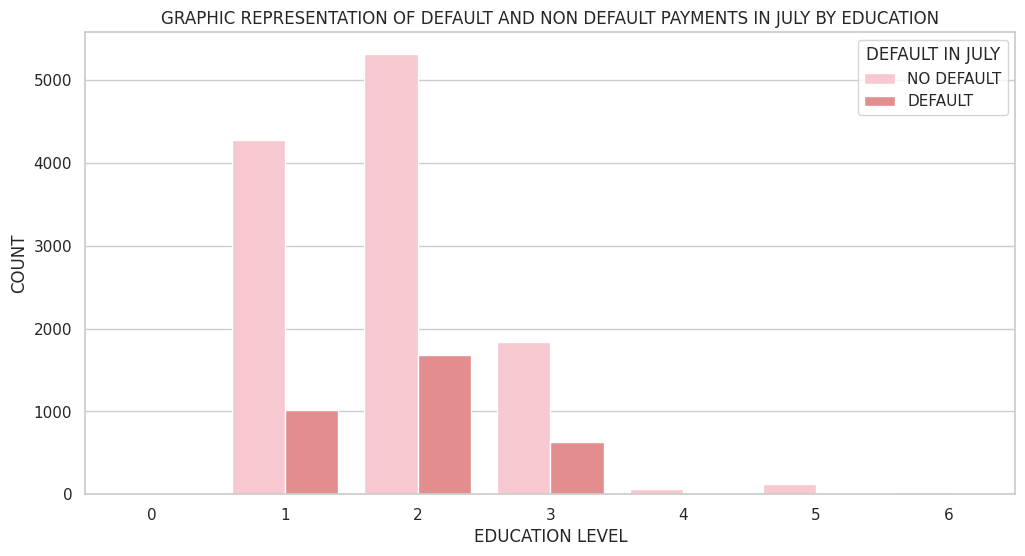

In [ ]:
#First way of doing it as a COUNTPLOT:
plt.figure(figsize=(12, 6))
sns.countplot(x=final_df["EDUCATION"], hue=final_df["DEFAULT_JULY"].astype(str), palette=["pink", "lightcoral"])

plt.title("GRAPHIC REPRESENTATION OF DEFAULT AND NON DEFAULT PAYMENTS IN JULY BY EDUCATION")
plt.xlabel("EDUCATION LEVEL")
plt.ylabel("COUNT")
plt.legend(title="DEFAULT IN JULY", labels=["NO DEFAULT", "DEFAULT"])
sns.set_style("darkgrid", {"axes.facecolor": ".98"})

plt.show()

In [ ]:
final_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,...,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY,DEFAULT_JULY
0,15936,140000.0,2,1,1,39,-1,-1,0,1,...,0.0,3260.0,797.0,3269.0,5000.0,2774.0,797.0,32617.0,190.0,0
1,15248,90000.0,2,2,1,49,-2,-1,-1,1,...,0.0,2146.0,0.0,2146.0,6990.0,3550.0,0.0,2452.0,0.0,1
2,27163,150000.0,2,1,1,37,-1,0,-1,-1,...,4787.0,1291.0,1046.0,1193.0,3000.0,0.0,1054.0,0.0,344.0,0
3,13955,160000.0,1,3,1,38,0,0,0,0,...,25003.0,15778.0,23621.0,5000.0,0.0,0.0,2000.0,1500.0,5060.0,0
4,23604,360000.0,1,2,1,28,2,-2,-2,-2,...,0.0,0.0,2500.0,0.0,0.0,0.0,2500.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,28636,330000.0,2,1,2,33,-2,2,2,1,...,-200.0,150.0,-200.0,350.0,200.0,0.0,0.0,0.0,0.0,0
14996,17730,50000.0,1,2,2,49,0,0,0,0,...,59236.0,34656.0,53689.0,2047.0,1000.0,2000.0,2000.0,5618.0,2124.0,1
14997,28030,410000.0,1,1,2,32,-1,-1,-1,-1,...,3339.0,623.0,13047.0,623.0,5973.0,4421.0,10000.0,4695.0,7764.0,0
14998,15725,200000.0,1,1,1,40,-2,-2,-2,-2,...,-7.0,19268.0,1765.0,19364.0,2547.0,33300.0,1772.0,5634.0,5099.0,0


In [ ]:
#Second way of doing it as a BAR PLOT:

In [ ]:
dff = final_df.groupby(['EDUCATION', 'DEFAULT_JULY']).size().reset_index(name='freq') #creating new DF

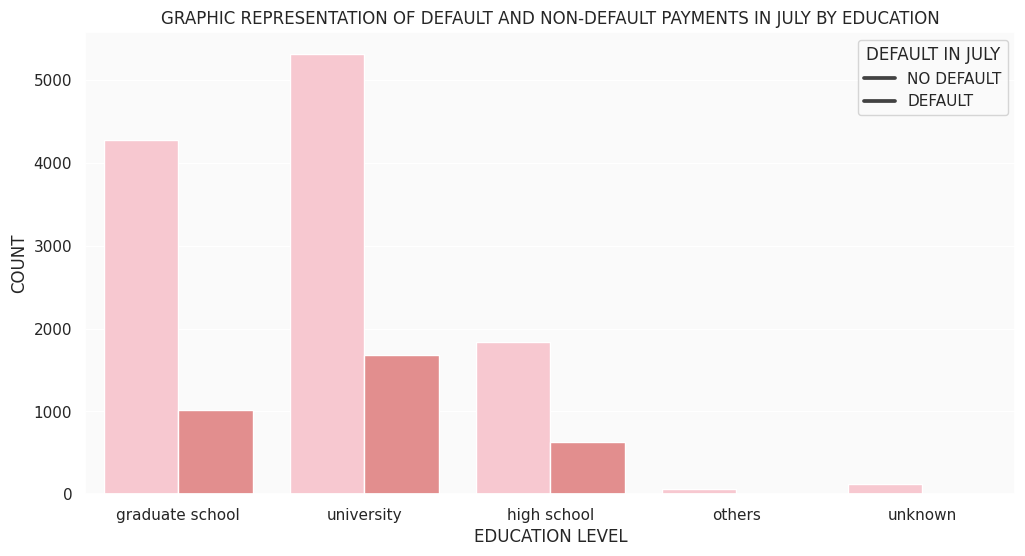

In [ ]:
dff['DEFAULT_JULY'] = dff['DEFAULT_JULY'].astype(str)

education_mapping = {
    1: 'graduate school',
    2: 'university',
    3: 'high school',
    4: 'others',
    5: 'unknown'
}

# Map the numerical values to their corresponding labels
dff['EDUCATION'] = dff['EDUCATION'].map(education_mapping)

plt.figure(figsize=(12, 6))
sns.barplot(data=dff, x='EDUCATION', y='freq', hue=dff['DEFAULT_JULY'], palette=['pink', 'lightcoral'])

plt.title('GRAPHIC REPRESENTATION OF DEFAULT AND NON-DEFAULT PAYMENTS IN JULY BY EDUCATION')
plt.xlabel('EDUCATION LEVEL')
plt.ylabel("COUNT")
plt.legend(title="DEFAULT IN JULY", labels=["NO DEFAULT", "DEFAULT"])
sns.set_style("darkgrid", {"axes.facecolor": ".98"})

plt.show()

**CONCLUSIONS:** Form the representation of default/ non default payments in july by the level of edcuation it is clear that the University students are the colective with more defaulter payments in July. However, it is also true that they are the ones with the less default followed by the graduate school students.


This results show that university students have more default payments in July compared to other education levels, but they also have relatively fewer defaults compared to graduate school students. It can be influenced by various factors such as their financial situation, educational deb and risk assessment.

The financial sector and credit services may be more present among university students, leading to more representation in the dataset. For their condition of students, university students may have more access to credit and financial services leading to  have a higher credit services. Additionally, they may have more access to part-time jobs or financial support from family, which could reduce their likelihood of default.

Graduate school students tend to be older and may have more financial responsibilities, this increased financial burden could lead to a higher likelihood of default, but in the graph it's not a predominant conclusion.

Nevertheless, I need to see the percentage of different labels of classes in this data set becasue there's 3 predominant classes appart form the others and maybe this is due to the fact that one class is bigger than the rest or predominant and maybe the amount of credit services is not proportional.

In [ ]:
education_proportions = final_df['EDUCATION'].value_counts(normalize=True)
education_proportions

2    0.466400
1    0.353067
3    0.164533
5    0.008933
4    0.004933
6    0.001667
0    0.000467
Name: EDUCATION, dtype: float64

- Level 2 (university) makes up approximately 46.64% of the dataset.
- Level 1 (graduate school) accounts for about 35.31% of the dataset.
- Level 3 (high school) represents around 16.45% of the dataset.

Therefore, what i thought is correct, the porportion of university students in the data set is very high and they represent the majority, same as the graduate. In the plot, it appears that the bars for "university" education level (2) are the tallest for both default and non-default categories. This indicates that university students are the most numerous in the data set, and they have the highest counts of both default and non-default payments. Graduate school students (level 1) follow closely in both default and non-default counts, but the total count is smaller than for university students. Moreover, the bars for other education levels (levels 3, 4, 5, and 6) appear to be much shorter, suggesting fewer individuals in those categories, and most of them are not in default, positive outcome for the Bank.

In short, while university students have a relatively high number of defaults, they also have a high number of non-default payments, indicating that they are the largest group in the data set and exhibit a mix of payment behaviors. Other education levels have smaller counts, with the majority of individuals not in default.

### **Question 2**

**BOX PLOT - Plot the distribution of `LIMIT_BAL` (amount of given credit in NT dollars (includes individual and family/supplementary credit) per defaulters and non-defaulters. Comment the results.**

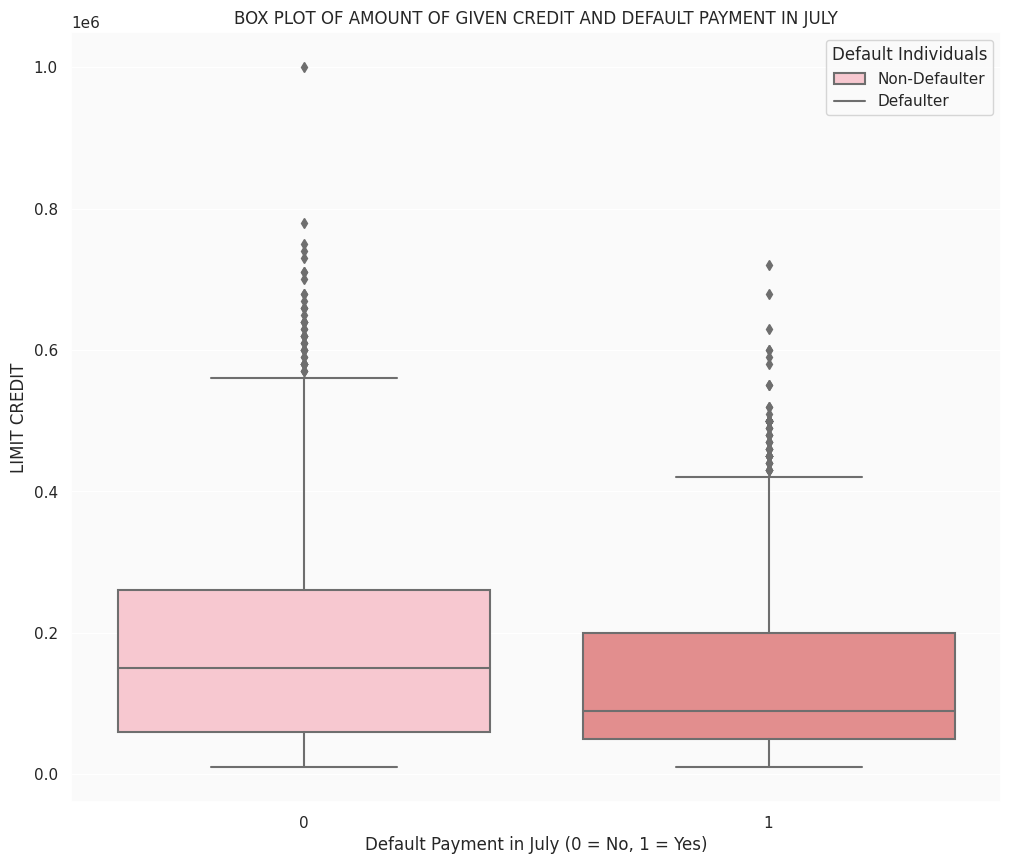

In [ ]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=final_df, x='DEFAULT_JULY', y='LIMIT_BAL', palette=["pink", "lightcoral"])
plt.title("BOX PLOT OF AMOUNT OF GIVEN CREDIT AND DEFAULT PAYMENT IN JULY")
plt.legend(title='Default Individuals', labels=['Non-Defaulter', 'Defaulter'])
plt.xlabel("Default Payment in July (0 = No, 1 = Yes)")
plt.ylabel("LIMIT CREDIT")
plt.show()

I am creating two box plots, one for defaulters (1) and one for non-defaulters (0). By comparing these two plots:
- Non-defaulters, on average, have a higher credit limit (LIMIT_BAL) than defaulters becasue the box is higher. The difference in median credit limits between the two groups is more favorable for non-defaulters.
- The spread or variation in credit limits is greater among non-defaulters compared to defaulters and that makes sense in the internal policy of a Bank (IQR for non-defaulters is wider, implying that some non-defaulters have significantly higher credit limits, while others have lower ones).
- There's outliers in both upper tails. For the class with a higher distribution of credit limits, it suggests there are individuals with exceptionally high credit limits compared to the rest of that group, whereas for the class with a lower distribution of credit limits, it implies there are individuals who have higher credit limits compared to the typical low credit limits of that group (maybe it is an indicator that one class or group could be better positioned in financial terms).

### **Question 3**

**Include 3 more interesting insights extracted from the data. Provide an explanation of the choices made and the results obtained.**

### DEFAULTERS IN JULY

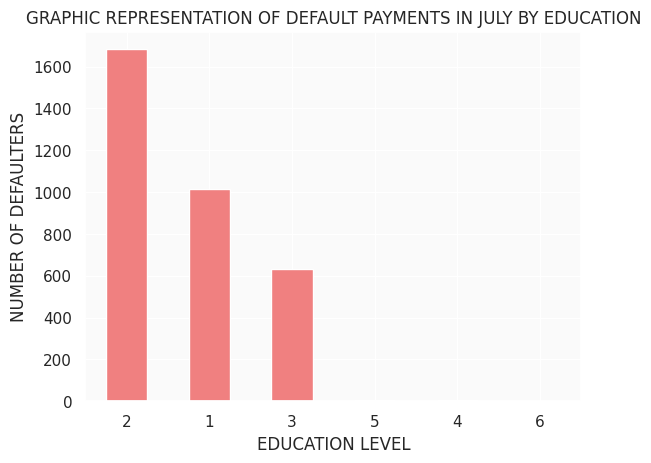

In [ ]:
defaulters = final_df[final_df['DEFAULT_JULY'] == 1]

# Grouping data by education labels and counting the number of defaulters in each category
education_counts = defaulters['EDUCATION'].value_counts()

education_counts.plot(kind='bar', color='lightcoral')
plt.title("GRAPHIC REPRESENTATION OF DEFAULT PAYMENTS IN JULY BY EDUCATION")
plt.xlabel("EDUCATION LEVEL")
plt.ylabel("NUMBER OF DEFAULTERS")
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

plt.show()

I wanted to see in which education label the number of defaulters was higher and as I saw with my bar plot it's the university individuals. taking into consideration their enviroment is logic to be the predominant class registred to have bigger amount of credit serivces and this may lead to a breach of the contract with the Bank and to default more often.

In [ ]:
final_df.DEFAULT_JULY.value_counts()

0    11659
1     3341
Name: DEFAULT_JULY, dtype: int64

Although, between default and no default the majority class is no default so this is an aspect that maybe influence our posterior models and analysis and I did 2 graphs to represents this imbalanced proportion of 2 classes, I did a countplot and a oie to represent the exact percentage of each class as you can see here:

## COUNTPLOT for the entire data set to see how many defaulters where in July in total

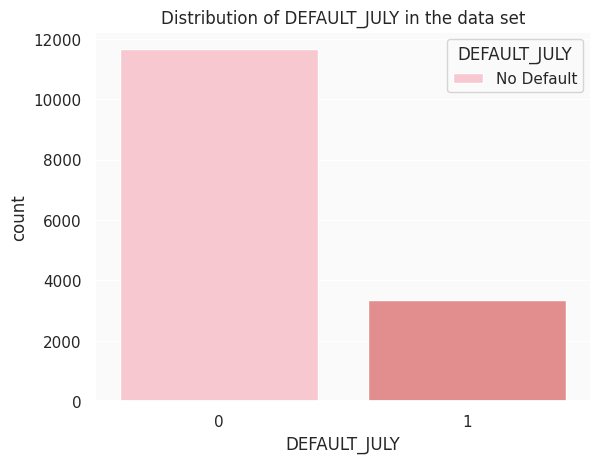

In [ ]:
sns.countplot(x=final_df["DEFAULT_JULY"], palette=["pink", "lightcoral"])
plt.title("Distribution of DEFAULT_JULY in the data set")
plt.legend(title="DEFAULT_JULY", labels=["No Default", "Default"])

From the countplot and the pie chart I can totally see a class imbalance in the dataset. In this case, the distribution of target classes is highly imbalanced, non-defaults far outnumber defaults. Although, here we are talking about a Bank record of their clients so it is showcasing possibly that most people pay credit cards on time assuming there's no marcoeconomic factors.

In [ ]:
px.pie(final_df, names="DEFAULT_JULY", template="none", title="A-priori probability of having default payments in July",  color_discrete_sequence=["lightcoral", "pink"])

In [ ]:
df_corr = final_df.corr()
xx = list(df_corr.columns)
yy = list(df_corr.index)
zz = np.array(df_corr)

fig = ff.create_annotated_heatmap(
    zz,
    x = xx,
    y = yy ,
    annotation_text = np.around(zz, decimals=2),
    hoverinfo='z',
    colorscale='RdBu'
)

fig.update_layout(
    height=1000
)
#There's no significant correlations

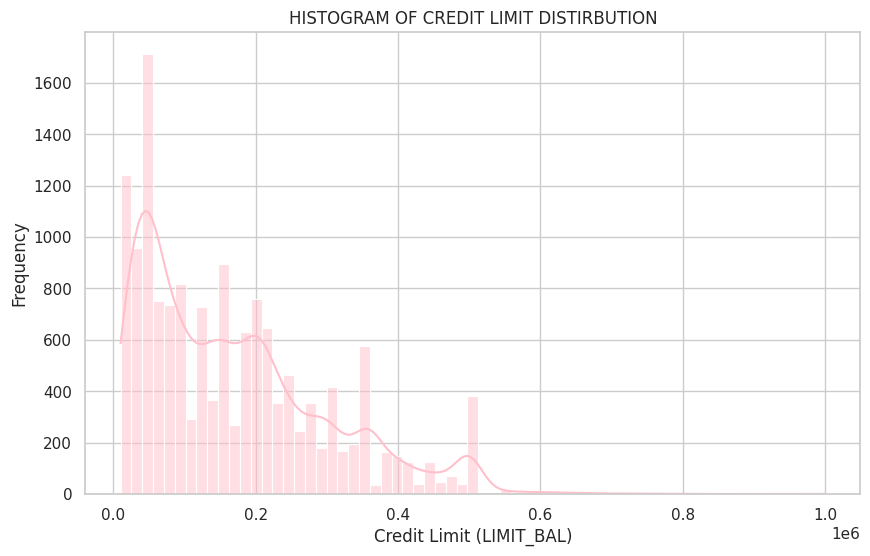

In [ ]:
# Assuming your data frame is named 'df'
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a histogram for the 'LIMIT_BAL' column
sns.histplot(data=final_df, x="LIMIT_BAL", kde=True, color="pink")

# Set labels and title
plt.xlabel("Credit Limit (LIMIT_BAL)")
plt.ylabel("Frequency")
plt.title("HISTOGRAM OF CREDIT LIMIT DISTIRBUTION")

plt.show()

This is the distirbution of credit limits in the data set which showcase three largest credit limit amount groups.

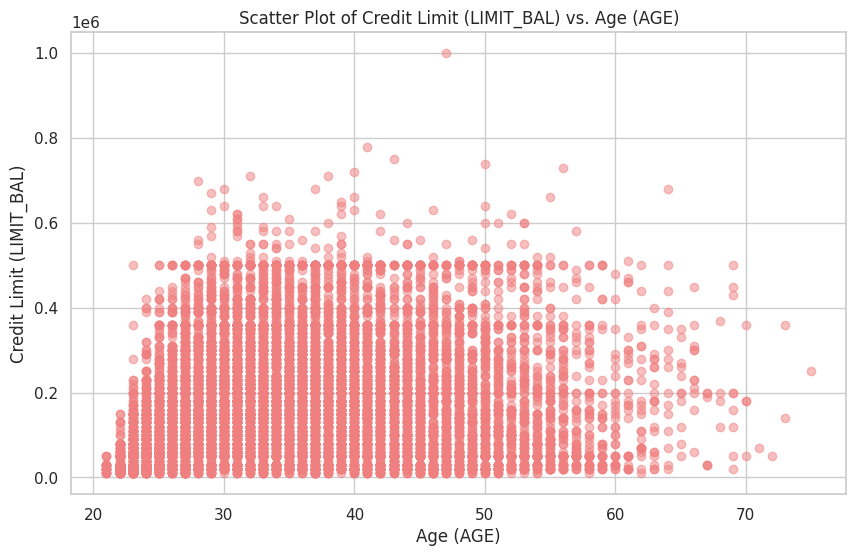

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(final_df['AGE'], final_df['LIMIT_BAL'], color='lightcoral', alpha=0.5)
plt.title('Scatter Plot of Credit Limit (LIMIT_BAL) vs. Age (AGE)')
plt.xlabel('Age (AGE)')
plt.ylabel('Credit Limit (LIMIT_BAL)')
plt.grid(True)
plt.show()

It showcase that the people who want credit is not the oyunguer and older ones. It's probabily students (university and graduate) and more mature people in their 40s-50s.

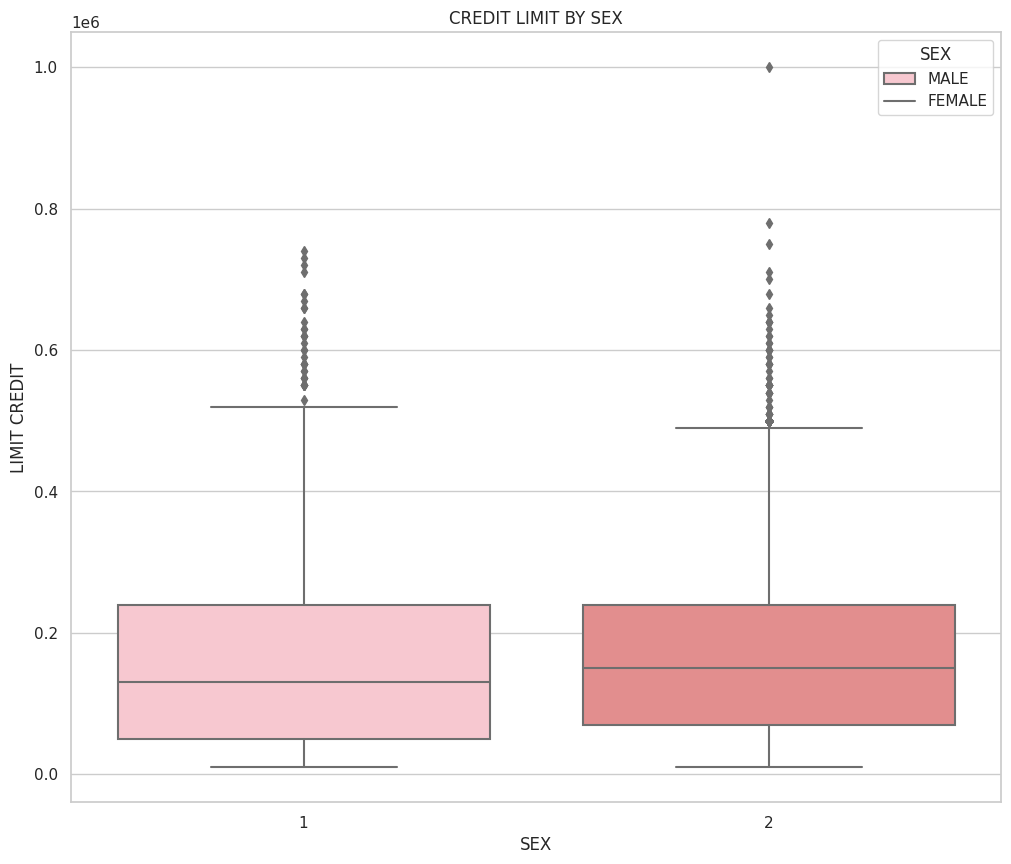

In [ ]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=final_df, x='SEX', y='LIMIT_BAL', palette=["pink", "lightcoral"])
plt.title("CREDIT LIMIT BY SEX")
plt.legend(title='SEX', labels=['MALE', 'FEMALE'])
plt.xlabel("SEX")
plt.ylabel("LIMIT CREDIT")
plt.show()

The data is evenly distributed amongst males and females

In [ ]:
final_df #MY DF

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,...,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY,DEFAULT_JULY
0,15936,140000.0,2,1,1,39,-1,-1,0,1,...,0.0,3260.0,797.0,3269.0,5000.0,2774.0,797.0,32617.0,190.0,0
1,15248,90000.0,2,2,1,49,-2,-1,-1,1,...,0.0,2146.0,0.0,2146.0,6990.0,3550.0,0.0,2452.0,0.0,1
2,27163,150000.0,2,1,1,37,-1,0,-1,-1,...,4787.0,1291.0,1046.0,1193.0,3000.0,0.0,1054.0,0.0,344.0,0
3,13955,160000.0,1,3,1,38,0,0,0,0,...,25003.0,15778.0,23621.0,5000.0,0.0,0.0,2000.0,1500.0,5060.0,0
4,23604,360000.0,1,2,1,28,2,-2,-2,-2,...,0.0,0.0,2500.0,0.0,0.0,0.0,2500.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,28636,330000.0,2,1,2,33,-2,2,2,1,...,-200.0,150.0,-200.0,350.0,200.0,0.0,0.0,0.0,0.0,0
14996,17730,50000.0,1,2,2,49,0,0,0,0,...,59236.0,34656.0,53689.0,2047.0,1000.0,2000.0,2000.0,5618.0,2124.0,1
14997,28030,410000.0,1,1,2,32,-1,-1,-1,-1,...,3339.0,623.0,13047.0,623.0,5973.0,4421.0,10000.0,4695.0,7764.0,0
14998,15725,200000.0,1,1,1,40,-2,-2,-2,-2,...,-7.0,19268.0,1765.0,19364.0,2547.0,33300.0,1772.0,5634.0,5099.0,0


In [ ]:
#final_df = final_df[['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_APRIL', 'PAY_FEBRUARY', 'PAY_JANUARY', 'PAY_JUNE', 'PAY_MARCH', 'PAY_MAY', 'DEFAULT_JULY']]--> for the correlations we could eliminate features

## **C. MACHINE LEARNING**

### **Question 7**


In [ ]:
final_df.to_csv('LlorensJudit_A_train.csv', index = False)
#Save CSV file for the PART A and B submission

In [ ]:
data_test = pd.read_csv('test_data.csv')
final_df = pd.concat([final_df, data_test])

The column ID is not needed so I put it as an index to clasirfy in the model building!!!

In [ ]:
final_df = final_df.drop(columns = ['ID'])

In [ ]:
#defining X and y
X= final_df.drop(columns='DEFAULT_JULY')
y= final_df["DEFAULT_JULY"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)

#control the shape of the train and test features and target to see it's doing right
print(f'X_train dims: {X_train.shape}')
print(f'y_train dims: {y_train.shape}')
print(f'X_test dims: {X_test.shape}')
print(f'y_test dims: {y_test.shape}')

X_train dims: (15410, 23)
y_train dims: (15410,)
X_test dims: (7590, 23)
y_test dims: (7590,)


## PREPROCESSING

In [ ]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,PAY_MARCH,...,BILL_AMT_JANUARY,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY
6629,130000.0,1,1,2,26,0,0,0,-1,0,...,14415.0,2343.0,15182.0,32278.0,1000.0,2000.0,390.0,32322.0,3000.0,1217.0
7282,360000.0,2,1,2,29,-1,-1,-1,-1,-1,...,4120.0,885.0,2640.0,10553.0,2700.0,4120.0,4118.0,10553.0,2000.0,2000.0
8250,10000.0,1,2,2,25,0,0,0,0,0,...,4323.0,3684.0,7134.0,4715.0,1500.0,1000.0,1000.0,1100.0,1000.0,1155.0
7938,200000.0,2,2,2,25,0,0,0,0,0,...,171010.0,195520.0,189557.0,195884.0,7011.0,6010.0,6000.0,7080.0,8500.0,8000.0
1823,440000.0,2,2,1,40,-1,-1,-1,-1,-1,...,840.0,3278.0,873.0,2028.0,874.0,841.0,7453.0,2035.0,874.0,982.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6572,30000.0,1,2,1,39,0,0,0,0,0,...,28994.0,29493.0,27962.0,30346.0,3000.0,9000.0,2000.0,2006.0,3000.0,1500.0
1768,500000.0,1,1,1,37,-1,0,0,1,-1,...,18524.0,271115.0,21770.0,15074.0,21976.0,7000.0,21769.0,15873.0,50000.0,16205.0
9929,20000.0,2,3,2,45,0,0,0,0,0,...,17082.0,12670.0,15408.0,13682.0,1243.0,1609.0,1500.0,1520.0,563.0,1234.0
3240,20000.0,1,3,1,48,-1,2,0,-1,-1,...,1170.0,1522.0,2126.0,1261.0,2126.0,0.0,150.0,1000.0,0.0,1261.0


I need to perform OHE to the categorical variables: SEX, MARRIAGE and EDUCATION:

In [ ]:
#  training data
X_train_cat = X_train[['SEX', 'MARRIAGE', 'EDUCATION']]
ohe = OneHotEncoder(sparse=False)
cat_data_ohe = ohe.fit_transform(X_train_cat)
cat_data_ohe = pd.DataFrame(cat_data_ohe, columns=ohe.get_feature_names_out(X_train_cat.columns))

X_train_non_cat = X_train.drop(columns=['SEX', 'MARRIAGE', 'EDUCATION'])
X_train_full = pd.concat([X_train_non_cat.reset_index(drop=True), cat_data_ohe], axis=1)

# testing data
X_test_cat = X_test[['SEX', 'MARRIAGE', 'EDUCATION']]
cat_data_ohe_test = ohe.transform(X_test_cat)
cat_data_ohe_test = pd.DataFrame(cat_data_ohe_test, columns=ohe.get_feature_names_out(X_test_cat.columns))

X_test_non_cat = X_test.drop(columns=['SEX', 'MARRIAGE', 'EDUCATION'])
X_test_full = pd.concat([X_test_non_cat.reset_index(drop=True), cat_data_ohe_test], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Also, is a good practice to normalize (mean==0, sd==1) the variables:

In [ ]:
sc = StandardScaler()

In [ ]:
# Fit and transform the TRAINING data
X_train_sc = sc.fit_transform(X_train_full)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train_full.columns)

# Transform the TESTING data
X_test_sc = sc.transform(X_test_full)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test_full.columns)

In [ ]:
X_train_full.head()

,LIMIT_BAL,AGE,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,PAY_MARCH,PAY_MAY,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,...,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6
0,130000.0,26,0,0,0,-1,0,-1,24175.0,12805.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,360000.0,29,-1,-1,-1,-1,-1,-1,1943.0,1741.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,10000.0,25,0,0,0,0,0,0,5785.0,3535.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,200000.0,25,0,0,0,0,0,0,194045.0,177185.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,440000.0,40,-1,-1,-1,-1,-1,-1,981.0,873.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_sc.head()

,LIMIT_BAL,AGE,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,PAY_MARCH,PAY_MAY,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,...,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6
0,-0.291438,-1.025821,0.141176,0.238796,0.256148,-0.879608,0.192809,-0.719624,-0.321800,-0.451406,...,-0.914958,0.936472,-0.098138,-0.019736,1.353972,-0.936228,-0.443412,-0.068035,-0.09471,-0.041895
1,1.479963,-0.699097,-0.696530,-0.643873,-0.614438,-0.879608,-0.664678,-0.719624,-0.641710,-0.635029,...,-0.914958,0.936472,-0.098138,-0.019736,1.353972,-0.936228,-0.443412,-0.068035,-0.09471,-0.041895
2,-1.215647,-1.134730,0.141176,0.238796,0.256148,0.014977,0.192809,0.118198,-0.586425,-0.605255,...,-0.914958,0.936472,-0.098138,-0.019736,-0.738567,1.068116,-0.443412,-0.068035,-0.09471,-0.041895
3,0.247684,-1.134730,0.141176,0.238796,0.256148,0.014977,0.192809,0.118198,2.122564,2.276725,...,-0.914958,0.936472,-0.098138,-0.019736,-0.738567,1.068116,-0.443412,-0.068035,-0.09471,-0.041895
4,2.096103,0.498893,-0.696530,-0.643873,-0.614438,-0.879608,-0.664678,-0.719624,-0.655552,-0.649435,...,1.092946,-1.067838,-0.098138,-0.019736,-0.738567,1.068116,-0.443412,-0.068035,-0.09471,-0.041895


## MODELS

### **LOGISTIC REGRESSION**

First I start with logistic regression to clear insight in a simple way. This wasy interpretability can help Banks understand the key factors driving credit card defaults and take appropriate actions to mitigate the risk.

In [ ]:
clf = LogisticRegression(solver='liblinear', max_iter=1000)

parameters = {
    'penalty': ['l2', 'l1'],
    'C': np.logspace(-4, 4, 1000),    #hyperparameter tunning
}

search = RandomizedSearchCV(
    clf,
    param_distributions=parameters,
    scoring="roc_auc",
    cv=3,
    refit=True,
    n_jobs=1,
    return_train_score=True,
    n_iter=5
)

In [ ]:
search.fit(X_train_full, y_train)

RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(max_iter=1000,
                                                solver='liblinear'),
                   n_iter=5, n_jobs=1,
                   param_distributions={'C': array([1.00000000e-04, 1.01861017e-04, 1.03756668e-04, 1.05687597e-04,
       1.07654461e-04, 1.09657929e-04, 1.11698682e-04, 1.13777413e-04,
       1.15894830e-04, 1.18051653e-04, 1.20248614e-04, 1.22486461e-04,
       1.24765955e-04, 1.27087871e-04, 1.2...
       7.04446228e+03, 7.17556092e+03, 7.30909933e+03, 7.44512291e+03,
       7.58367791e+03, 7.72481145e+03, 7.86857151e+03, 8.01500696e+03,
       8.16416760e+03, 8.31610415e+03, 8.47086827e+03, 8.62851257e+03,
       8.78909065e+03, 8.95265713e+03, 9.11926760e+03, 9.28897872e+03,
       9.46184819e+03, 9.63793480e+03, 9.81729841e+03, 1.00000000e+04]),
                                        'penalty': ['l2', 'l1']},
                   return_train_score=True, scoring='roc_auc')

In [ ]:
lr_model = search.best_estimator_
lr_model

LogisticRegression(C=38.157646612712526, max_iter=1000, penalty='l1',
                   solver='liblinear')

*EVALUATE THE MODEL*

In [ ]:
# Train
y_pred_train = lr_model.predict(X_train_full)
y_proba_train = lr_model.predict_proba(X_train_full)

# Test
y_pred_test = lr_model.predict(X_test_full)
y_proba_test_lr = lr_model.predict_proba(X_test_full)

In [ ]:
# Train
accuracy_train = round(accuracy_score(y_train, y_pred_train), 2)
precision_train = round(precision_score(y_train, y_pred_train), 2)
recall_train = round(recall_score(y_train, y_pred_train), 2)
f1_train = round(f1_score(y_train, y_pred_train), 2)
roc_auc_train = round(roc_auc_score(y_train, y_proba_train[:,1]), 2)

results_lr = pd.DataFrame([[accuracy_train, precision_train, recall_train, f1_train, roc_auc_train]],
                          columns = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'], index = ['Train'])

# Test
accuracy_test = round(accuracy_score(y_test, y_pred_test), 2)
precision_test = round(precision_score(y_test, y_pred_test), 2)
recall_test = round(recall_score(y_test, y_pred_test), 2)
f1_test = round(f1_score(y_test, y_pred_test), 2)
roc_auc_test = round(roc_auc_score(y_test, y_proba_test_lr[:,1]), 2)

results_lr = results_lr.append(pd.DataFrame([[accuracy_test, precision_test, recall_test, f1_test, roc_auc_test]],
                            columns = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'], index = ['Test']))
results_lr

<ipython-input-180-0f87426bc1e2>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Accuracy,Precision,Recall,F1-score,AUC
Train,0.81,0.72,0.24,0.36,0.73
Test,0.81,0.74,0.25,0.37,0.73


From the results of the model i can say:

- The train and test results should be similar and in this case they are quite similar so it leads to a good trained model (if not maybe it will indicate a problem of overfitting)

- Accuracy (81% test):the model correctly classified 81% of the instances in the dataset. It means that 81% of the credit card accounts were correctly classified as either "defaulters" or "non-defaulters". However, we've seen that the model is imbalanced in the target (between defaulters and non-defaulters) so a high accuracy score can be misleading (the model may be biased toward the majority class- non-defaulters).

- Precision (74% test): when the model predicts a credit card defaulter, it is correct about 74% of the time. In the context of minimizing financial loss, high precision is valuable because it means that when the model flags a customer as a potential defaulter, there's a good chance it is. In short, measures how accurate your model is when it says someone might not pay their credit card bill. So, when precision is high, it means that when the model predicts that someone might not pay, it's usually right and it can help in reducing the number of false alarms, which may lead to unnecessary interventions or account restrictions.


- Recall (24% test): the model correctly identified only 24% of the actual credit card defaulters. Therefore, the model may have missed a significant portion of default cases. In this context, a higher recall is generally desirable because it means catching more actual defaulters.

- F1 Score (37% test): the F1 score balances precision and recall. It indicates that there is a trade-off between minimizing false alarms (precision) and identifying more defaulters (recall) and here it's very low. In short, it's a measure of the model's overall accuracy in identifying credit card defaulters while considering both false positives and false negatives.

- ROC AUC Score (73% test): measures the model's ability to distinguish between positive and negative cases across different probability thresholds. An ROC AUC score of 73% means that the model is relatively good at distinguishing between defaulters and non-defaulters, with a higher likelihood of ranking a randomly chosen defaulter higher than a randomly chosen non-defaulter. If it was higher it will imporve in better separating credit card defaulters from non-defaulters.

From this a more visual represenation is:

In [ ]:
# Create the confusion matrix
print(classification_report(y_test, y_pred_test))

conf = pd.DataFrame(confusion_matrix(y_test, y_pred_test), columns=['Predicted 0', 'Predicted 1'], index  =['True 0', 'True 1'])
display(conf)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5872
           1       0.74      0.25      0.37      1718

    accuracy                           0.81      7590
   macro avg       0.78      0.61      0.63      7590
weighted avg       0.80      0.81      0.77      7590



,Predicted 0,Predicted 1
True 0,5723,149
True 1,1289,429


In [ ]:
#plot_confusion_matrix(y_test, y_pred_test, x_tick_rotation=60, figsize=(6,6), text_fontsize='large');

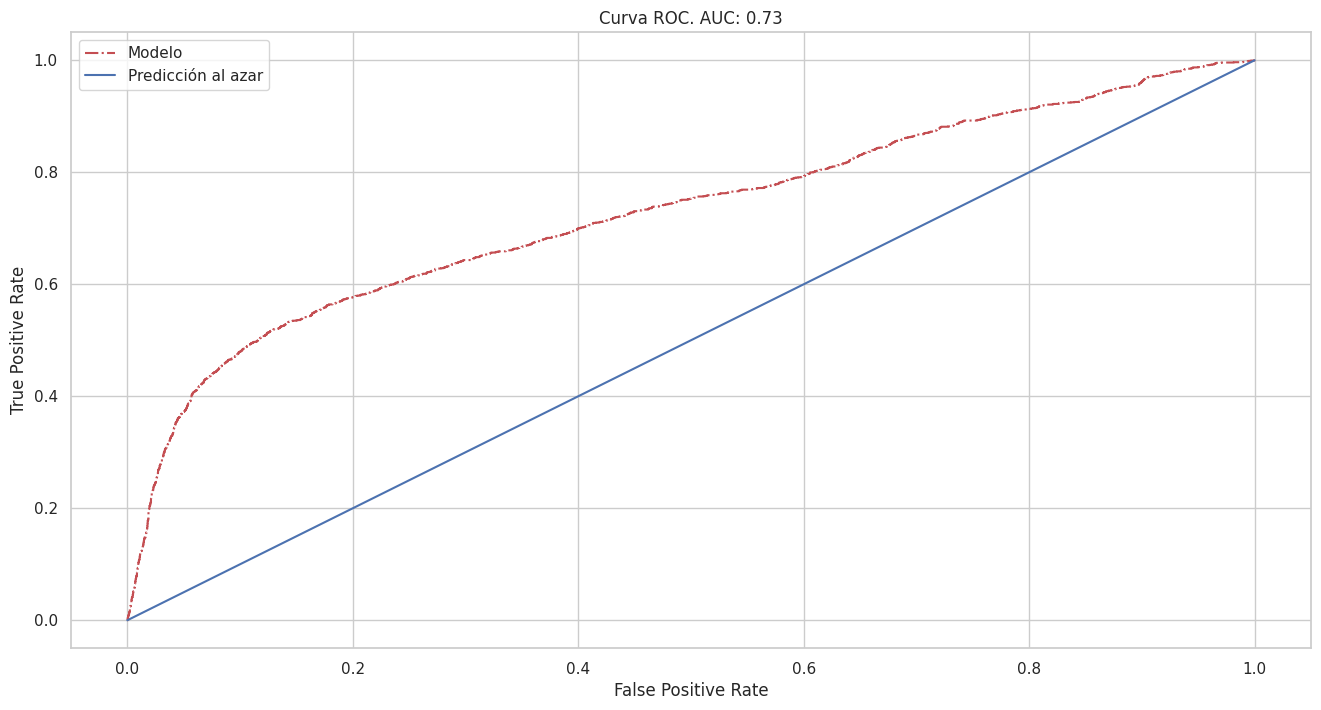

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test_lr[:, 1])

fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(fpr, tpr, 'r-.', label = f'Modelo')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.plot(fpr, fpr, 'b-', label = 'Predicción al azar')
ax.legend()
ax.set_title(f'Curva ROC. AUC: {round(auc(fpr, tpr), 2)}')
plt.show()

The bigger the AUC the better in this approach

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
print(f"R2: {r2_score(y_train, y_pred_train)}")
print(f"MSE: {mean_squared_error(y_train, y_pred_train)}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train)}")
print(f"MAPE: {mean_absolute_percentage_error(y_train, y_pred_train)} %")

R2: -0.08873711513240523
MSE: 0.1852693056456846
MAE: 0.1852693056456846
MAPE: 94689570361326.62 %


## **DECISION TREE**

In [ ]:
parameters = dict(
    n_estimators=[10, 25, 50, 100, 200],
    max_depth=range(3, 10)                   #hyperparameter tunning
)

clf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=parameters,
    scoring="roc_auc",
    n_jobs=1,
    return_train_score=True
)

In [ ]:
clf.fit(X_train_full, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': range(3, 10),
                         'n_estimators': [10, 25, 50, 100, 200]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
print(clf.best_params_) #best hyperparameters

{'max_depth': 9, 'n_estimators': 200}


In [ ]:
rf_model = clf.best_estimator_
rf_model

RandomForestClassifier(max_depth=9, n_estimators=200)

*EVALUATE THE MODEL*

In [ ]:
# Train
y_pred_train = rf_model.predict(X_train_full)
y_proba_train = rf_model.predict_proba(X_train_full)

# Test
y_pred_test = rf_model.predict(X_test_full)
y_proba_test_rf = rf_model.predict_proba(X_test_full)

In [ ]:
# Train
accuracy_train = round(accuracy_score(y_train, y_pred_train), 2)
precision_train = round(precision_score(y_train, y_pred_train), 2)
recall_train = round(recall_score(y_train, y_pred_train), 2)
f1_train = round(f1_score(y_train, y_pred_train), 2)
roc_auc_train = round(roc_auc_score(y_train, y_proba_train[:,1]), 2)

results_rf = pd.DataFrame([[accuracy_train, precision_train, recall_train, f1_train, roc_auc_train]],
                          columns = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'], index = ['Train'])

# Test
accuracy_test = round(accuracy_score(y_test, y_pred_test), 2)
precision_test = round(precision_score(y_test, y_pred_test), 2)
recall_test = round(recall_score(y_test, y_pred_test), 2)
f1_test = round(f1_score(y_test, y_pred_test), 2)
roc_auc_test = round(roc_auc_score(y_test, y_proba_test_rf[:,1]), 2)

results_rf = results_rf.append(pd.DataFrame([[accuracy_test, precision_test, recall_test, f1_test, roc_auc_test]],
                            columns = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'], index = ['Test']))
results_rf

<ipython-input-190-ab50b7331991>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Accuracy,Precision,Recall,F1-score,AUC
Train,0.86,0.85,0.42,0.56,0.85
Test,0.82,0.70,0.35,0.47,0.78


From the results of the model i can say:

- The train and test results should be similar and in this case they are quite similar so it leads to a good trained model (if not maybe it will indicate a problem of overfitting)

- Accuracy (82% test):the model correctly classified 81% of the instances in the dataset. It means that 82% of the credit card accounts were correctly classified as either "defaulters" or "non-defaulters". However, we've seen that the model is imbalanced in the target (between defaulters and non-defaulters) so a high accuracy score can be misleading (the model may be biased toward the majority class- non-defaulters).

- Precision (70% test): when the model predicts a credit card defaulter, it is correct about 70% of the time.


- Recall (35% test): it is better than linear model, the model correctly identified only 24% of the actual credit card defaulters. Therefore, the model may have missed a significant portion of default cases.

- F1 Score (46% test): it is higher than the linear model, the F1 score balances precision and recall.

- ROC AUC Score (78% test): it is a good estimator, it measures the model's ability to distinguish between positive and negative cases across different probability thresholds. Means that the model is relatively good at distinguishing between defaulters and non-defaulters.

From this a more visual represenation is:

In [ ]:
# Create the confusion matrix
print(classification_report(y_test, y_pred_test))

conf = pd.DataFrame(confusion_matrix(y_test, y_pred_test), columns=['Predicted 0', 'Predicted 1'], index  =['True 0', 'True 1'])
display(conf)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5872
           1       0.70      0.35      0.47      1718

    accuracy                           0.82      7590
   macro avg       0.77      0.65      0.68      7590
weighted avg       0.80      0.82      0.79      7590



,Predicted 0,Predicted 1
True 0,5615,257
True 1,1117,601


In [ ]:
#plot_confusion_matrix(y_test, y_pred_test, x_tick_rotation=60, figsize=(6,6), text_fontsize='large');

NameError: ignored

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test_rf[:, 1])

fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(fpr, tpr, 'r-.', label = f'Modelo')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.plot(fpr, fpr, 'b-', label = 'Predicción al azar')
ax.legend()
ax.set_title(f'Curva ROC. AUC: {round(auc(fpr, tpr), 2)}')
plt.show()

The AUC is better than the firs model.

In [ ]:
print(f"R2: {r2_score(y_train, y_pred_train)}")
print(f"MSE: {mean_squared_error(y_train, y_pred_train)}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train)}")
print(f"MAPE: {mean_absolute_percentage_error(y_train, y_pred_train)} %")

In [ ]:
import joblib
joblib.dump(rf_model, "model.pkl")
my_model = joblib.load("model.pkl")

## **SVC**

In [ ]:
parameters = {
    'C': np.logspace(-3, 3, 1000),    #hyperparameter tunning
}

search = RandomizedSearchCV(
    SVC(probability=True),
    param_distributions=parameters,
    scoring="roc_auc",
    cv=3,
    refit=True,
    n_jobs=1,
    return_train_score=True,
    n_iter=5,
    verbose = 3
)

In [ ]:
search.fit(X_train_full, y_train)

In [ ]:
print(search.best_params_) #best hyperparameters

In [ ]:
svc_model = search.best_estimator_

*EVALUATE THE MODEL*

In [ ]:
# Train
y_pred_train = svc_model.predict(X_train_full)
y_proba_train = svc_model.predict_proba(X_train_full)

# Test
y_pred_test = svc_model.predict(X_test_full)
y_proba_test_svc = svc_model.predict_proba(X_test_full)

In [ ]:
# Train
accuracy_train = round(accuracy_score(y_train, y_pred_train), 2)
precision_train = round(precision_score(y_train, y_pred_train), 2)
recall_train = round(recall_score(y_train, y_pred_train), 2)
f1_train = round(f1_score(y_train, y_pred_train), 2)
roc_auc_train = round(roc_auc_score(y_train, y_proba_train[:,1]), 2)

results_svc = pd.DataFrame([[accuracy_train, precision_train, recall_train, f1_train, roc_auc_train]],
                          columns = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'], index = ['Train'])

# Test
accuracy_test = round(accuracy_score(y_test, y_pred_test), 2)
precision_test = round(precision_score(y_test, y_pred_test), 2)
recall_test = round(recall_score(y_test, y_pred_test), 2)
f1_test = round(f1_score(y_test, y_pred_test), 2)
roc_auc_test = round(roc_auc_score(y_test, y_proba_test_svc[:,1]), 2)

results_svc = results_svc.append(pd.DataFrame([[accuracy_test, precision_test, recall_test, f1_test, roc_auc_test]],
                            columns = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'], index = ['Test']))

From the results of the model i can say:

- The train and test results should be similar and in this case they are quite similar so it leads to a good trained model (if not maybe it will indicate a problem of overfitting)

- Accuracy (77% test):the model correctly classified 77% of the instances in the dataset, less than the previous models.

- Precision (21% test): when the model predicts a credit card defaulter, it is correct about 21% of the time so it is a really bad result, hte model won't predict as expected.

- Recall (00% test): REALLY BAD! A recall score of 0 indicates that the model is not identifying any of the true positive cases, meaning it is failing to correctly classify individuals who are likely to default on their credit card payments. For the goal to minimize money loss by identifying and preventing defaults this result is really bad. The model is not capturing the people likely to default on their credit card payments and this is very bad for the general goal (taking prevention to this customers). This can result in financial losses for the bank, as you're not identifying the high-risk accounts. This risk is becasue as a Bank it can provide credit to individuals likely to do default and it can bring financial losses. Therefore, this model is really bad.

- F1 Score (1% test): Although is a really good score becasue it's making accurate predictions, it's important to consider this result in a real-world scenario. A lot of classification problems involve trade-offs between precision and recall, and it can be challenging to achieve both at the highest level. Moreover, the quality of the data and the representativeness of the dataset can impact model performance.

- ROC AUC Score (63% test): it is less than the other models, it measures the model's ability to distinguish between positive and negative cases across different probability thresholds.

From this a more visual represenation is:

In [ ]:
# Create the confusion matrix
print(classification_report(y_test, y_pred_test))

conf = pd.DataFrame(confusion_matrix(y_test, y_pred_test), columns=['Predicted 0', 'Predicted 1'], index  =['True 0', 'True 1'])
display(conf)

This model is really bad predictiong!!! It predicts all 0 (non default)

In [ ]:
#plot_confusion_matrix(y_test, y_pred_test, x_tick_rotation=60, figsize=(6,6), text_fontsize='large');

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test_svc[:, 1])

fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(fpr, tpr, 'r-.', label = f'Modelo')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.plot(fpr, fpr, 'b-', label = 'Predicción al azar')
ax.legend()
ax.set_title(f'Curva ROC. AUC: {round(auc(fpr, tpr), 2)}')
plt.show()

# Final Results
Comparing my three models outcomes to see which one is the best and try to improve it:

In [ ]:
results_lr #LINEAR MODEL

In [ ]:
results_rf #RANDOM FOREST MODEL

In [ ]:
results_svc #SVC MODEL

In [ ]:
# Calculate Area Under ROC Curve (AUC)
auc_lr = round(roc_auc_score(y_test, y_proba_test_lr[:, 1]), 4)
auc_rf = round(roc_auc_score(y_test, y_proba_test_rf[:, 1]), 4)
auc_svc = round(roc_auc_score(y_test, y_proba_test_svc[:, 1]), 4)

# Curva ROC
fpr_lr, tpr_lr, th_lr = roc_curve(y_test, y_proba_test_lr[:, 1])
fpr_rf, tpr_rf, th_rf = roc_curve(y_test, y_proba_test_rf[:, 1])
fpr_svc, tpr_svc, th_svc = roc_curve(y_test, y_proba_test_svc[:, 1])

# Grpah de las curvas ROC
plt.figure(figsize = (16, 8))
plt.plot(fpr_lr, tpr_lr, 'r-.', label = f'LOGR, AUC: {auc_lr}')
plt.plot(fpr_rf, tpr_rf, 'g-.', label = f'RF, AUC: {auc_rf}')
plt.plot(fpr_svc, tpr_svc, 'b-.', label = f'SVC, AUC: {auc_svc}')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr_lr, fpr_lr, '-', label = 'Random predict')
plt.legend()
plt.show()

The RANDOM FOREST model is the better so far. Therefore, I will make the predicitons with unseen data with this model

# Training final model

## Preparing training data

In [ ]:
X = final_df.drop(columns='DEFAULT_JULY')
y = final_df["DEFAULT_JULY"]

In [ ]:
# training data
X_cat = X[['SEX', 'MARRIAGE', 'EDUCATION']]
ohe = OneHotEncoder(sparse=False)
cat_data_ohe = ohe.fit_transform(X_cat)
cat_data_ohe = pd.DataFrame(cat_data_ohe, columns=ohe.get_feature_names_out(X_cat.columns))

X_non_cat = X.drop(columns=['SEX', 'MARRIAGE', 'EDUCATION'])
X = pd.concat([X_non_cat.reset_index(drop=True), cat_data_ohe], axis=1)

In [ ]:
sc = StandardScaler()

In [ ]:
# Fit and transform the TRAINING data
X_sc = sc.fit_transform(X)
X_sc = pd.DataFrame(X_sc, columns=X.columns)

### Training

In [ ]:
print(clf.best_params_)
model = RandomForestClassifier(n_estimators=50, max_depth=9)

In [ ]:
# print(clf.best_params_)
# model = RandomForestClassifier(n_estimators=50, max_depth=9)--> other way of doing it but i prefer the easy way:
#model = RandomForestClassifier(**clf.best_params_)

In [ ]:
# Training model with 23k rows, 15k training + 8k test_data.csv
model.fit(X_sc, y)

## Preparing submission data

In [ ]:
sub_data = pd.read_csv('submission_features.csv')
ids = sub_data['ID']
sub_data = sub_data.drop(columns = ['ID'])

In [ ]:
# training data
sub_data_cat = sub_data[['SEX', 'MARRIAGE', 'EDUCATION']]
cat_data_ohe = ohe.transform(sub_data_cat)
cat_data_ohe = pd.DataFrame(cat_data_ohe, columns=ohe.get_feature_names_out(sub_data_cat.columns))

sub_data_non_cat = sub_data.drop(columns=['SEX', 'MARRIAGE', 'EDUCATION'])
sub_data = pd.concat([sub_data_non_cat.reset_index(drop=True), cat_data_ohe], axis=1)

In [ ]:
# Same columns order--> if not ERROR!
sub_data = sub_data.reindex(X.columns, axis=1)

In [ ]:
# Transform the test data
sub_data_sc = sc.transform(sub_data)
sub_data_sc = pd.DataFrame(sub_data_sc, columns=sub_data.columns)

In [ ]:
y_pred = model.predict_proba(sub_data_sc)[:, 1]

In [ ]:
#KAGGLE SUBMISSION:
sub_data['DEFAULT_JULY'] = y_pred
sub_data['ID'] = ids
sub_data = sub_data[['ID', 'DEFAULT_JULY']]
sub_data.to_csv('result_judit.csv', index=False)

### **Question 8**


In [ ]:
# Last 8k rows of X (test_data.csv)
X_test = X_sc.iloc[-8000:]
y_test = y.iloc[-8000:]

In [ ]:
def get_profit(thr):
    preds = (model.predict_proba(X_test)[:, 1] >= thr).astype(int)
    conf_matrix = confusion_matrix(y_test, preds)

    TN = np.sum((preds == 0) & (y_test == 0))
    FN = np.sum((preds == 0) & (y_test == 1))

    expected_profit = (TN * 1000) - (FN * 5000)
    return expected_profit

In [ ]:
# Check it!!!!
thresholds = np.linspace(0, 1, 101)
profits = [get_profit(i) for i in thresholds]

best_thr = thresholds[np.argmax(profits)]

print(f'Best threshold: {best_thr}')
print(f'Expected profit: {max(profits)}$')

In [ ]:
plt.figure(figsize = (20, 6))

plt.plot(thresholds, profits)
plt.axvline(x = best_thr, ls = '--', color = 'red')
plt.title('Profit by threshold')
plt.xlabel('Threshold')
plt.ylabel('Profit')

plt.show()

In [ ]:
import json
with open('threshold.json', 'w') as f:
    json.dump({'threshold': best_thr}, f)